<a href="https://colab.research.google.com/github/philstachia/sml_project/blob/main/SML_project_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms
import sklearn.metrics as skl_met
from sklearn.naive_bayes import GaussianNB



In [3]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/siren_data_train.csv')

In [14]:

data

,near_fid,near_x,near_y,near_angle,heard,building,xcoor,ycoor,noise,in_vehicle,asleep,no_windows,age
0,2712,1.998301e+06,9.011692e+06,-171.588672,1,0,1999193.0,9011824,0,0,0,0,59
1,2721,1.928907e+06,8.954624e+06,-51.208102,1,0,1928298.0,8955382,0,0,0,0,29
2,297,2.026384e+06,8.256164e+06,39.018754,1,0,2025706.0,8255615,0,0,0,0,32
3,739,1.743184e+06,8.052652e+06,15.046022,1,0,1742935.0,8052585,0,0,0,0,36
4,1852,1.350375e+06,7.909850e+06,144.603170,1,0,1350807.0,7909543,0,0,0,0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5705,5,2.008871e+06,8.255775e+06,-176.234663,1,0,2009140.0,8255793,0,0,0,0,29
5706,4069,1.981871e+06,8.270452e+06,45.691415,1,0,1981119.0,8269682,0,0,0,0,49
5707,2170,1.463760e+06,8.074997e+06,-175.473118,1,0,1464308.0,8075040,0,0,0,0,62
5708,1591,1.479843e+06,7.526377e+06,142.958054,1,0,1480125.0,7526164,0,0,0,0,37


Does the distance to the nearest horn affect if the signal is heard or not?

mean distance not heard: 25396.70411509891 
 mean distance heard: 1231.6191575001023 


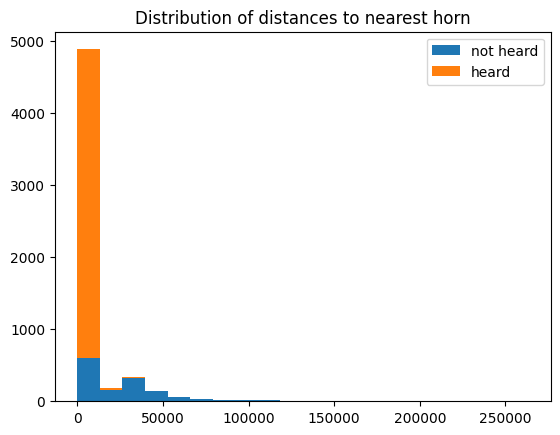

In [4]:
#near_x = data['near_x']
#near_y = data['near_y']
#xcoor = data['xcoor']
#ycoor = data['ycoor']
#distance = np.sqrt((xcoor-near_x)**2+(ycoor-near_y)**2)
#X_train = distance
data['dist'] = np.sqrt((data['xcoor']-data['near_x'])**2+
 (data['ycoor']-data['near_y'])**2)
X_train = data['dist']
Y_train = data['heard']
X_not_heard = [X_train[i] for i, y in enumerate(Y_train) if y == 0]
X_heard = [X_train[i] for i, y in enumerate(Y_train) if y == 1]
print(f'mean distance not heard: {np.mean(X_not_heard)} \n mean distance heard: {np.mean(X_heard)} ')
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist((X_not_heard,X_heard), 20, histtype='bar', stacked=True, label = ['not heard','heard'])
ax.set_title('Distribution of distances to nearest horn')
ax.legend()
plt.show()

Yes the distance affects the output.

Does the age affect?

mean age not heard: 60.215328467153284 
 mean age heard: 47.611981566820276 


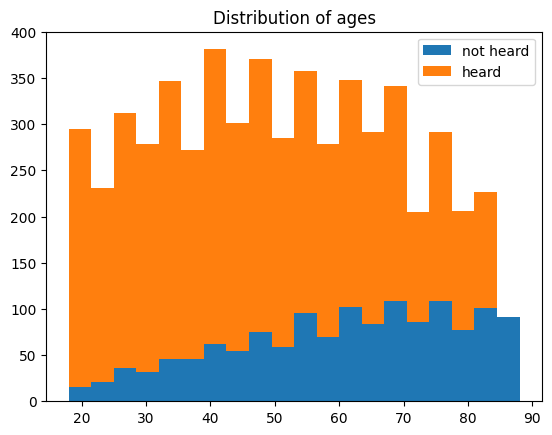

In [5]:

X_train = data['age']
Y_train = data['heard']
X_not_heard = [X_train[i] for i, y in enumerate(Y_train) if y == 0]
X_heard = [X_train[i] for i, y in enumerate(Y_train) if y == 1]
print(f'mean age not heard: {np.mean(X_not_heard)} \n mean age heard: {np.mean(X_heard)} ')
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist((X_not_heard,X_heard), 20, histtype='bar', stacked=True, label = ['not heard','heard'])
ax.set_title('Distribution of ages')
ax.legend()
plt.show()

Yes the age affects if the signal is heard or not, younger people tend to hear the signal better.

Does the angle to the nearest horn affect?

mean angle not heard: 0.4689099902833939 
 mean angle heard: 2.1570210628475692 


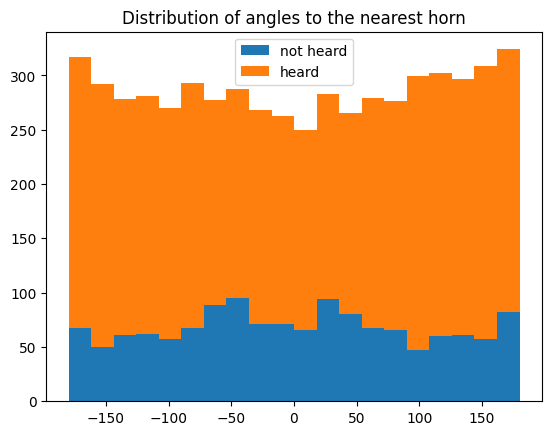

In [6]:
X_train = data['near_angle']
Y_train = data['heard']
X_not_heard = [X_train[i] for i, y in enumerate(Y_train) if y == 0]
X_heard = [X_train[i] for i, y in enumerate(Y_train) if y == 1]
print(f'mean angle not heard: {np.mean(X_not_heard)} \n mean angle heard: {np.mean(X_heard)} ')
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist((X_not_heard,X_heard), 20, histtype='bar', stacked=True, label = ['not heard','heard'])
ax.set_title('Distribution of angles to the nearest horn')
ax.legend()
plt.show()

The angle does not affect the output.

Question 4: Implementation of methods

Since we saw that both distance and age affected the output we want to use these inputs for training

(a) implement the methods: LDA and QDA

In [10]:
data

,near_fid,near_x,near_y,near_angle,heard,building,xcoor,ycoor,noise,in_vehicle,asleep,no_windows,age,dist
0,2712,1.998301e+06,9.011692e+06,-171.588672,1,0,1999193.0,9011824,0,0,0,0,59,901.283517
1,2721,1.928907e+06,8.954624e+06,-51.208102,1,0,1928298.0,8955382,0,0,0,0,29,972.006260
2,297,2.026384e+06,8.256164e+06,39.018754,1,0,2025706.0,8255615,0,0,0,0,32,872.340924
3,739,1.743184e+06,8.052652e+06,15.046022,1,0,1742935.0,8052585,0,0,0,0,36,257.804449
4,1852,1.350375e+06,7.909850e+06,144.603170,1,0,1350807.0,7909543,0,0,0,0,55,529.686791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5705,5,2.008871e+06,8.255775e+06,-176.234663,1,0,2009140.0,8255793,0,0,0,0,29,269.161517
5706,4069,1.981871e+06,8.270452e+06,45.691415,1,0,1981119.0,8269682,0,0,0,0,49,1076.700725
5707,2170,1.463760e+06,8.074997e+06,-175.473118,1,0,1464308.0,8075040,0,0,0,0,62,549.581267
5708,1591,1.479843e+06,7.526377e+06,142.958054,1,0,1480125.0,7526164,0,0,0,0,37,353.136892


Split into training and test sets

In [23]:

#X = [x1,x2] where x1 = dist and x2 = age, y = heard
X_train, X_test, y_train, y_test = skl_ms.train_test_split(data[['dist','age']],
                                                           data[['heard']],
                                                           test_size=0.2,
                                                           random_state=1,
                                                           shuffle=True)

Normalization of data

In [24]:
scaler = skl_pre.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Compare methods

In [33]:
#LDA
model = skl_da.LinearDiscriminantAnalysis()
model.fit_transform(X_train, y_train.values.ravel())
prediction = model.predict(X_test)
error = np.mean(prediction != y_test.values)
print(f'error rate for LDA: {error}')
print('confusion matrix for LDA:')
print(pd.crosstab(prediction.ravel(), y_test.values.ravel()))
print(f'f1-score for LDA: {skl_met.f1_score(y_test.values.ravel(),prediction.ravel())}')

#QDA
model = skl_da.QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train.values.ravel())
prediction = model.predict(X_test)
error = np.mean(prediction!= y_test.values)
print(f'\n error rate for QDA: {error}')
print('confusion matrix for QDA:')
print(pd.crosstab(prediction.ravel(), y_test.values.ravel()))
print(f'f1-score for QDA: {skl_met.f1_score(y_test.values.ravel(),prediction.ravel())}')

#naive model, always predict 1 (heard)
prediction = np.ones(shape=np.shape(y_test),dtype=np.int8)
error = np.mean(prediction!= y_test.values)
print(f'\n error rate for naive model: {error}')
print('confusion matrix for naive model:')
print(pd.crosstab(prediction.ravel(), y_test.values.ravel()))
print(f'f1-score for naive model: {skl_met.f1_score(y_test.values.ravel(),prediction.ravel())}')


error rate for LDA: 0.4992407993374249
confusion matrix for LDA:
col_0    0    1
row_0          
0      591  134
1      269  742
f1-score for LDA: 0.7864334923158453

 error rate for QDA: 0.49828516213977786
confusion matrix for QDA:
col_0    0    1
row_0          
0      530   15
1      330  861
f1-score for QDA: 0.8330914368650217

 error rate for naive model: 0.49539170506912444
confusion matrix for naive model:
col_0    0    1
row_0          
1      860  876
f1-score for naive model: 0.6707503828483921


Note that the error rate is highest for QDA, then LDA and the lowest for the naive model. However, the f1-score is higher for both LDA and QDA, QDA has the highest. This is due to the imbalanced

Analyze with k-fold

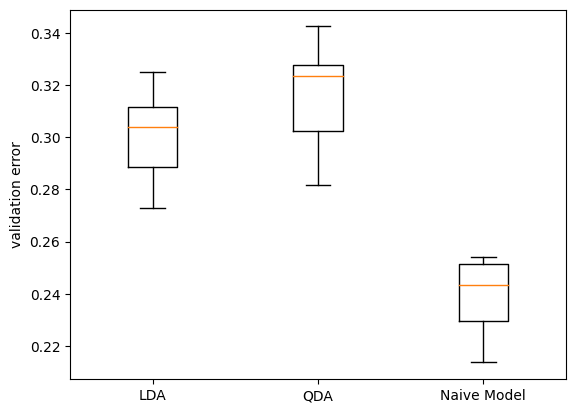

In [28]:
X, y = data[['dist','age']], data[['heard']]

scaler = skl_pre.MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X)) #normailzation

n_fold = 10

models = []

models.append(skl_da.LinearDiscriminantAnalysis())
models.append(skl_da.QuadraticDiscriminantAnalysis())
models.append('Naive Model')

misclassification = np.zeros((n_fold,len(models)))
cv = skl_ms.KFold(n_splits=n_fold, random_state = 42, shuffle = True)

for i, (train_index, val_index) in enumerate(cv.split(X)):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]

  for m in range(np.shape(models)[0]-1):
    model = models[m]
    model.fit(X_train, y_train.values.ravel())
    prediction = model.predict(X_val)
    misclassification[i, m] = np.mean(prediction!= y_val.values)

  prediction = np.ones(np.shape(X_val),dtype=np.int8 )
  misclassification[i, -1] = np.mean(prediction!= y_val.values)


plt.boxplot(misclassification)
plt.xticks(np.arange(len(models))+1,('LDA','QDA','Naive Model'))
plt.ylabel('validation error')
plt.show()